# 2D Arrays / Images in Numpy/Python
## Chris Tralie

In [1]:
import numpy as np # This is the main numerical library we will use
import matplotlib.pyplot as plt # This is the main plotting library we will use
import skimage # A library for doing some extra stuff with image processing

/home/ctralie/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


## 2D Arrays
First, it's possible to have lists of lists in Python, and they can contain <i>heterogenous</i> collections of elements.  So, for instance, some of the elements of a list can be lists, others can be single elements, and others can be strings

In [2]:
# Show list of lists, np.zeros with tuple
x = [[0, 0, 1, 0], [2, 4, -2, 1], [0, 0, 1, 0], [-1, 1, 5, 2], "chris"]
print(x[1])

[2, 4, -2, 1]


In [3]:
(x[1])[2] = 17
print(x)

[[0, 0, 1, 0], [2, 4, 17, 1], [0, 0, 1, 0], [-1, 1, 5, 2], 'chris']


In [4]:
x[1] = 1
print(x)

[[0, 0, 1, 0], 1, [0, 0, 1, 0], [-1, 1, 5, 2], 'chris']


If what you want is a list of lists, all with the same length, though, then numpy provides a much simpler way to construct them as "2D arrays."  Such arrays can be thought of as images.  To show this, we make a random image and display it using different colormaps.  More information about colormaps can be found <a href = "https://matplotlib.org/tutorials/colors/colormaps.html">here</a>

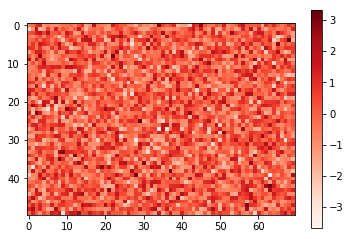

In [5]:
x = np.random.randn(50, 70)
plt.imshow(x, cmap='Reds')
plt.colorbar()

We can now see that slices in 2D arrays basically work the same way as they do in 1D arrays, but we have to specify a slice for both rows and columns.  The row slice comes first, then a comma, then the column slice.  We can use this to create three line segments towards the upper left of an image

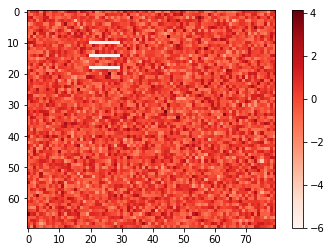

In [6]:
x = np.random.randn(70, 80)
x[10:20:4, 20:30] = -6
plt.imshow(x, cmap='Reds')
plt.colorbar()


We now create a low resolution circle image to demonstrate the <code>flatten</code> command, which we convert from a 2D array to a 1D array by taking the elements of the 2D array out one in "raster order," which is simply reading them as you would read a book (left to right, top to bottom).  In this example, the 2D array is 20 rows by 20 columns, so the flattened 1D array has 400 elements.

(20, 20)


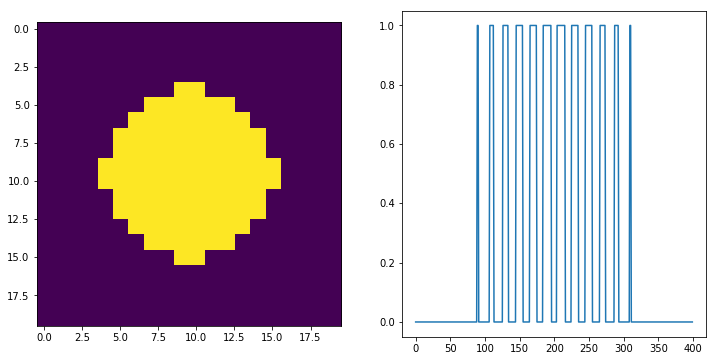

In [7]:
# Show flatten
pix = np.linspace(-1, 1, 20)
X, Y = np.meshgrid(pix, pix)
r = 0.6
blob = (X**2 + Y**2) < r**2
blob_flat = blob.flatten()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(blob)
plt.subplot(1, 2, 2)
plt.plot(blob_flat)
print(blob.shape)

## RGB Images

Next, we discuss color images, which are actually <i>3D arrays</i>.  This is because they have a third dimension for color.  Humans perceive color in 3D, so there are 3 channels: red (0), green (1), and blue (2)

(512, 512, 3)


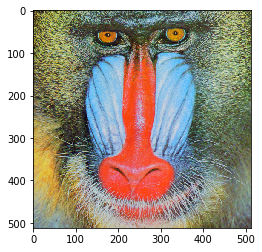

In [8]:
# Load in image, show shape command
X = skimage.io.imread("mandrill.png")
plt.imshow(X)
print(X.shape)

If we take out a slice which is all of the rows and columns in the green channel, and we set that slice to be random, we get random green noise on top of the red and blue channel data

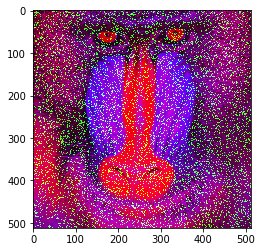

In [9]:
Y = np.array(X)
Y[:, :, 1] = np.random.randn(Y.shape[0], Y.shape[1])
plt.imshow(Y)

We can plot one of the channels as an image using a labeled colormap.  For example, if we take out the red channel (the 0th channel), we see that it has a very high value around the mandrill's nose compared to other pixels, which makes sense since its nose is very red.  We also notice in the colorbar that the values of color channels range from 0 to 255 pixels (they are "8 bit").

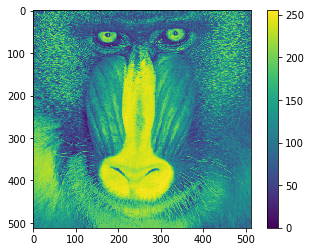

In [10]:
plt.imshow(X[:, :, 0])
plt.colorbar()

We can also do weird stuff like swapping the red and green channels

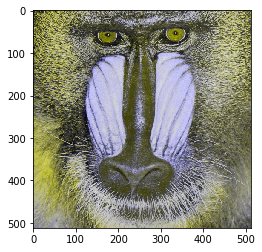

In [11]:
X[:, :, 0], X[:, :, 1] = X[:, :, 1], X[:, :, 0]
plt.imshow(X)

Just to drive the 2D slicing point home, we take a box from row 30 to row 99 and from column 100 to column 299 in the red channel and set it to the max value (255).  Now we see a red box over the mandrill's eye

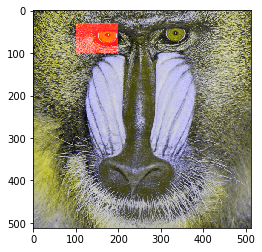

In [12]:
X[30:100, 100:200, 0] = 255
plt.imshow(X)

Finally, let's look at how to convert a color image to a grayscale image.  A grayscale image has the same value in the red, green, and blue channels for each pixel.  Lower values are darker, while higher values are brighter.  It turns out that a perceptually meaningful way to convert RGB to grayscale is to take a <i>weighted average</i> of red green and blue which is $0.2125 R + 0.7154 G + 0.0721B$

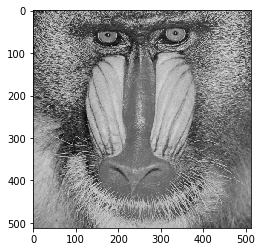

In [13]:
# Use 0.2125R + 0.7154G + 0.0721B to convert to grayscale
X = skimage.io.imread("mandrill.png")
XGray = 0.2125*X[:, :, 0] + 0.7154*X[:, :, 1] + 0.0721*X[:, :, 2]
# Now set each channel to this weighted average
X[:, :, 0] = XGray
X[:, :, 1] = XGray
X[:, :, 2] = XGray
plt.imshow(X)

## Aliasing / Moiré Patterns

We can use slices to do specific transformations to images.  For example, we can reverse all of the rows to flip the image vertically

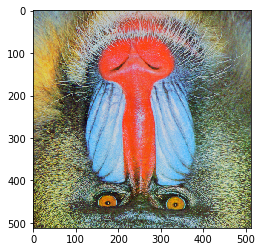

In [14]:
X = skimage.io.imread("mandrill.png")
plt.imshow(X[::-1, :, :])

We can also take only every other row and every other column to downsample the image.  In the mandrill example, this takes us from a 512x512 image to a 256x256 image.

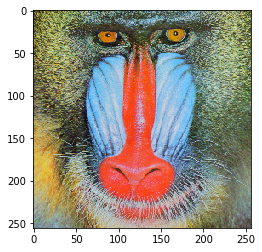

In [15]:
Y = X[0::2, 0::2, :]
plt.imshow(Y)

However, as with audio, we have to be careful about taking only one out of every so many rows or columns, because this can lead to strange patterns.  For example, in this image of a man with a striped shirt, if we take only one out of every six pixels, the stripes in the resulting image are bigger, and they go the wrong way!  This is known as <i>aliasing</i>

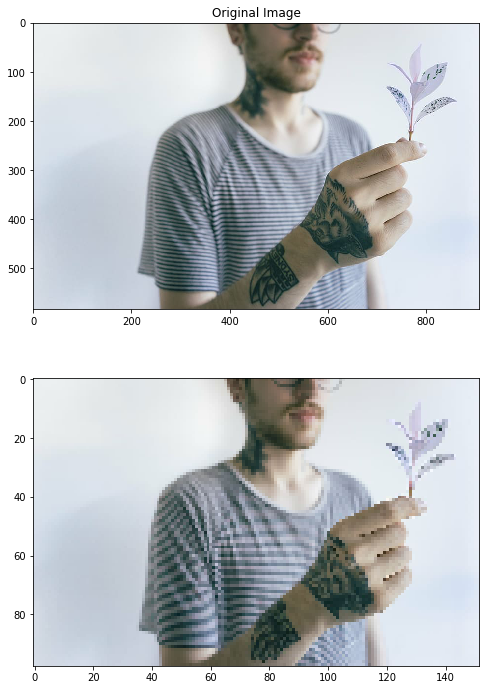

In [16]:
# Show aliasing
X = skimage.io.imread("hand-tattoos-hold-man.jpg")
fac = 6
Y = X[0::fac, 0::fac, :]

plt.figure(figsize=(8, 12))
plt.subplot(2, 1, 1)
plt.imshow(X)
plt.title("Original Image")
plt.subplot(2, 1, 2)
plt.imshow(Y)

Here's another example with more regular stripes

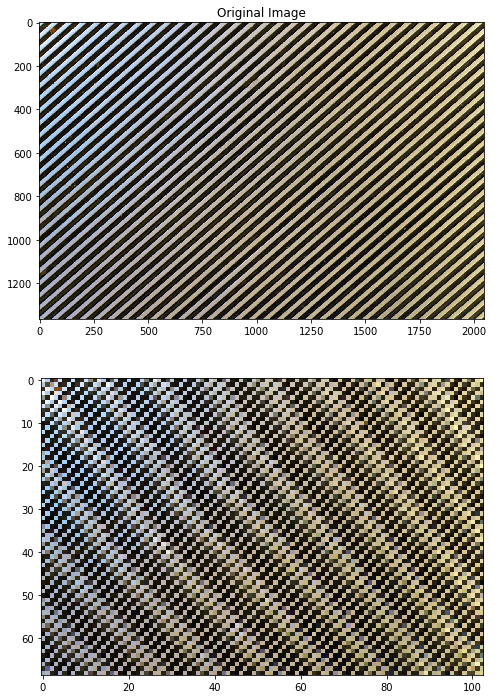

In [17]:
# Show aliasing / Moire pattern
X = skimage.io.imread("Stripes.jpg")
fac = 20
Y = X[0::fac, 0::fac, :]

plt.figure(figsize=(8, 12))
plt.subplot(2, 1, 1)
plt.imshow(X)
plt.title("Original Image")
plt.subplot(2, 1, 2)
plt.imshow(Y)

## Quantization / Dithering
As our last application, we explore a technique for drawing grayscale images with only pure white or pure black ink, which is useful for newspaper printing (for example).  First, let's load in an image and convert it to grayscale

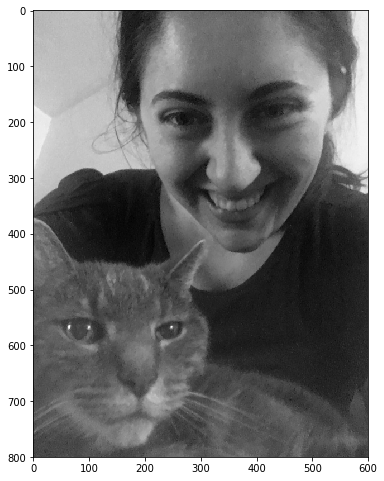

In [18]:
X = skimage.io.imread("CeliaDarcy.png")
X = 0.2125*X[:, :, 0] + 0.7154*X[:, :, 1] + 0.0721*X[:, :, 2]
plt.figure(figsize=(6, 10))
plt.imshow(X, cmap='gray')

Next, we'll round every pixel with a grayscale value above 127 to 255 (pure white), and we'll round every pixel with a grayscale value below 127 to 0 (pure black)

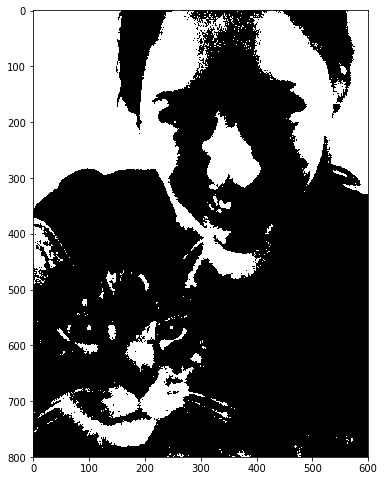

In [19]:
Y = 255*np.round(X/255)
plt.figure(figsize=(6, 10))
plt.imshow(Y, cmap='gray')

This looks pretty bad, though, as we've lost a lot of features.  One thing that we can do to help is to add a bit of noise (random values) to the image before rounding.  Darker regions will still have more black pixels than lighter regions, but that the probability is proportional to the grayscale value, so we're able to retain more features this way (we don't completely clobber a region with grayscale values of 120 even though they're so close to the rounding threshold of 127).

<b>Note</b>: A much more effective scheme for dithering is known as the Floyd-Steinberg dither, which you can read more about <a href = "https://en.wikipedia.org/wiki/Floyd%E2%80%93Steinberg_dithering">here</a>

Text(0.5,1,'Dithered Image')

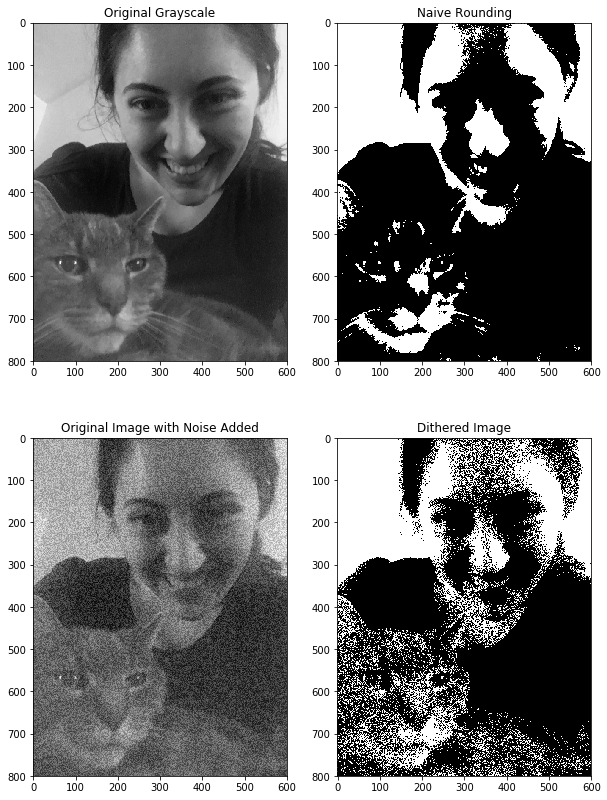

In [20]:
fac = 0.25
Y = (1-fac)*X + (255*fac)*np.random.rand(X.shape[0], X.shape[1])
Z = 255*np.round(Y/255)
plt.figure(figsize=(10, 14))
plt.subplot(2, 2, 1)
plt.imshow(X, cmap='gray')
plt.title("Original Grayscale")
plt.subplot(2, 2, 2)
plt.imshow(255*np.round(X/255), cmap='gray')
plt.title("Naive Rounding")
plt.subplot(2, 2, 3)
plt.imshow(Y, cmap='gray')
plt.title("Original Image with Noise Added")
plt.subplot(2, 2, 4)
plt.imshow(Z, cmap='gray')
plt.title("Dithered Image")